In [1]:
#In this project, I am visualizing and making calculations
#from medical examination data using matplotlib, seaborn, and pandas.
#using the dataset to explore the relationship between cardiac disease, body measurements,
#blood markers, and lifestyle choices.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [145]:
#Importing data
df = pd.read_csv("medical_examination.csv")
df.head(5)
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [148]:
# Adding 'overweight' column
df['overweight'] = df['weight']/pow(df['height']/100,2)
df['overweight'].values[df['overweight'].values <= 25] = 0
df['overweight'].values[df['overweight'].values > 25] = 1
df['overweight']=df['overweight'].astype('int64')
df.head(10)





,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


In [134]:
## Normalizing data by making 0 always good and 1 always bad. 
##If the value of 'cholesterol' or 'gluc' is 1, making the value 0. If the value is more than 1, making the value 1.
df['cholesterol'].values[df['cholesterol'].values == 1] = 0
df['cholesterol'].values[df['cholesterol'].values > 1] = 1
df['gluc'].values[df['gluc'].values == 1] = 0
df['gluc'].values[df['gluc'].values > 1] = 1
df.head(10)




,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


Figure(1058.88x500)


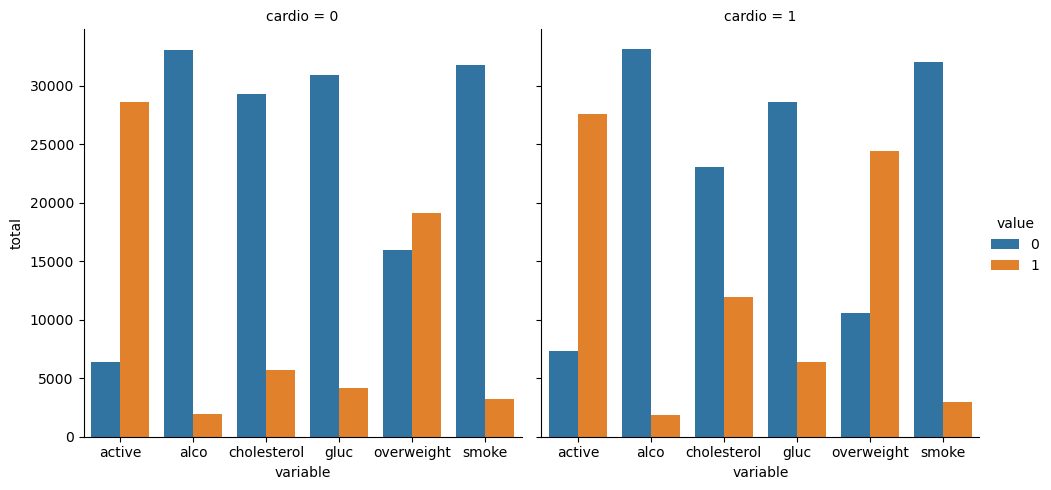

In [138]:
#Converting the data into long format and creating a chart that shows the value counts of the categorical features
#using seaborn's catplot(). The dataset is splited by 'Cardio' 
#so there is one chart for each cardio value. 
# Drawing Categorical Plot
def draw_cat_plot():
   
    df_cat=pd.melt(df,id_vars=["cardio"], value_vars =['active', 'alco','cholesterol','gluc','overweight','smoke'])


    # Grouping and reformating the data to split it by 'cardio'. Showing the counts of each feature. 
    df_cat=df_cat.groupby(['cardio','variable'],as_index=False)
    df_cat=df_cat[['value']].value_counts()


    # Drawing the catplot with 'sns.catplot()'
    fig=sns.catplot(data=df_cat, kind='bar', x='variable', y='count',hue='value',col='cardio')
    fig.set_xlabels('variable')
    fig.set_ylabels('total')
    
    #Converting catplot to a figure
    fig=fig.fig
    fig.savefig('catplot.png')
    return fig





print(draw_cat_plot())

In [15]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [143]:
##Question 5

# Drawing Heat Map
def draw_heat_map():
    # Cleaning the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculating the correlation matrix
    corr=df_heat.corr().round(1)

    # Generating a mask for the upper triangle
    #mask = np.triu(corr)
    #mask[np.triu_indices_from(mask)] = True
    mask=np.triu(np.ones(corr.shape))


    # Setting up the matplotlib figure
    fig, ax = plt.subplots(figsize=(16,9))

    cbar_kws = {"orientation":"vertical", 
            "shrink":0.5,
            "ticks":np.linspace(-0.08,0.24,5)
           }
    
    
    # Drawing the heatmap with 'sns.heatmap()'
    graph=sns.heatmap(corr,center=0,
                mask=mask,annot=True,square=True,
                fmt=".1f",vmax=0.30,linewidths=1,
                linecolor='white',cbar_kws=cbar_kws)

    
    #Converting heatmap to a figure
    fig=graph.figure
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


Figure(1600x900)


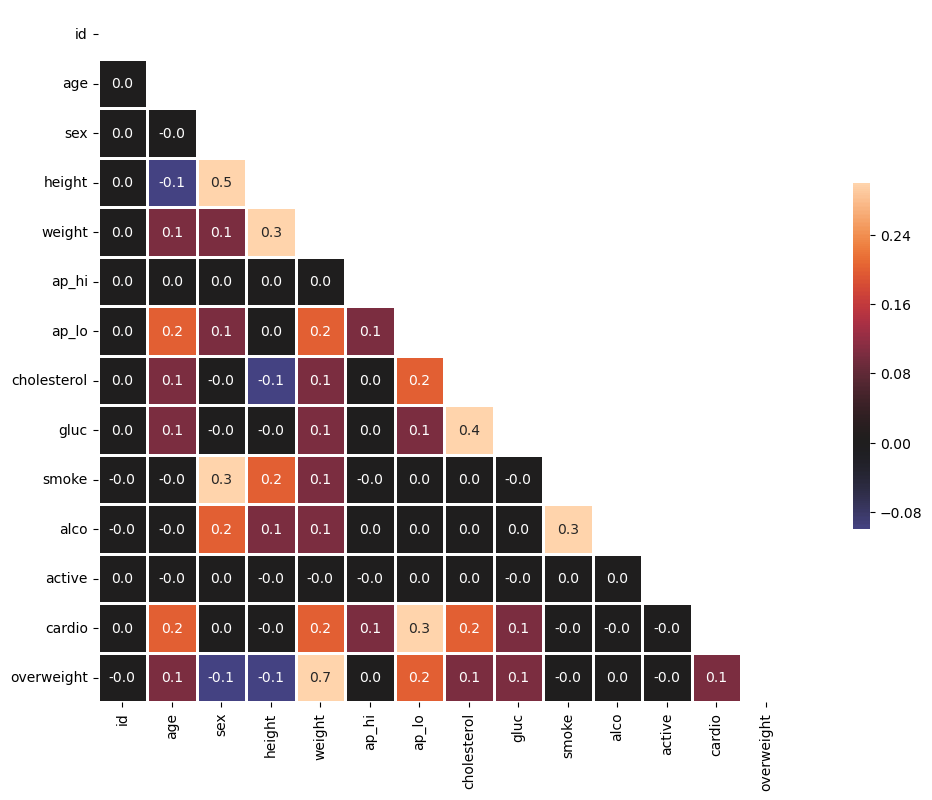

In [144]:
print(draw_heat_map())

In [126]:
The End:)